In [3]:
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
from collections import Counter  # To count occurrences of each element in an iterable
import seaborn as sns
from itertools import product
import numpy as np


In [4]:
#loading the dataset
df = pd.read_parquet('/content/cleaned_spotify_dataset.parquet')
df.head(10)

,row_id,user_id,artist,track,playlist
7,7,9cc0cfd4d7d7885102480dd99e7a90d6,Joe Echo,Beautiful,HARD ROCK 2010
13,13,9cc0cfd4d7d7885102480dd99e7a90d6,Crowded House,Don't Dream It's Over,HARD ROCK 2010
22,22,9cc0cfd4d7d7885102480dd99e7a90d6,Cocktail Slippers,Here We Go,HARD ROCK 2010
33,33,9cc0cfd4d7d7885102480dd99e7a90d6,Paul McCartney,Live And Let Die,HARD ROCK 2010
42,42,9cc0cfd4d7d7885102480dd99e7a90d6,Joshua Radin,Only You,HARD ROCK 2010
65,65,9cc0cfd4d7d7885102480dd99e7a90d6,Joshua Radin,Winter,HARD ROCK 2010
67,67,9cc0cfd4d7d7885102480dd99e7a90d6,Noah And The Whale,5 Years Time,IOW 2012
69,69,9cc0cfd4d7d7885102480dd99e7a90d6,Pearl Jam,Alive,IOW 2012
70,70,9cc0cfd4d7d7885102480dd99e7a90d6,Tom Petty And The Heartbreakers,American Girl,IOW 2012
73,73,9cc0cfd4d7d7885102480dd99e7a90d6,Pearl Jam,Black,IOW 2012


In [5]:
len(df) #how many songs we have in dataset

1625282

what artists and songs are most popular?

In [6]:
artist_counter=Counter(list(df['artist']))
song_counter = Counter(list(df['track']))
print("\n Top artists:{}\n".format(artist_counter.most_common(20)))
#most_commun : returns a list of tuple of the singer and occurence time
print("\n Top songs:{}\n".format(song_counter.most_common(20)))



 Top artists:[('Daft Punk', 18971), ('Coldplay', 18696), ('Kanye West', 13457), ('Mumford & Sons', 11229), ('Eminem', 11129), ('Rihanna', 10859), ('The xx', 10747), ('Calvin Harris', 10566), ('Muse', 10394), ('Arctic Monkeys', 10127), ('Foo Fighters', 10033), ('Katy Perry', 9600), ('Lana Del Rey', 9186), ('Imagine Dragons', 9024), ('Lady Gaga', 8818), ('David Guetta', 8632), ('Beyoncé', 8624), ('JAY Z', 8415), ('The Killers', 8367), ('Radiohead', 8324)]


 Top songs:[('Intro', 6676), ('Home', 5600), ('Closer', 3549), ('Runaway', 3350), ('Hold On', 3224), ('Radioactive', 3189), ('Forever', 3055), ('Stay', 2993), ('Alive', 2936), ('Wake Me Up', 2794), ('Heaven', 2793), ('Trouble', 2789), ('Kids', 2714), ('Breathe', 2696), ('Crazy', 2692), ('Dreams', 2691), ('Angel', 2683), ('Happy', 2660), ('You', 2645), ('One', 2622)]



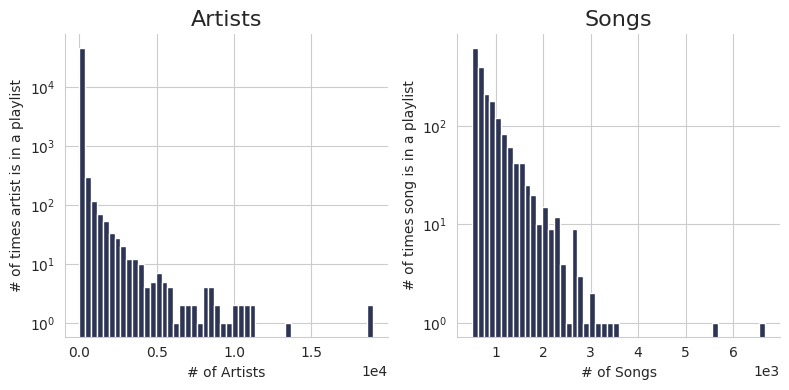

In [7]:

def plot_distribution(artist_counter, song_counter, n_bins=50, outpath='./artist-track-dist.png'):
    """
    Plot distributions of tracks and artists in the final dataset.
    """
    sns.set_style('whitegrid')  # Set a style for the plots

    fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(8, 4)) #1 fig with 2 subplots

    # Artists histogram
    axs[0].hist(artist_counter.values(), bins=n_bins, color='#2E3454')
    axs[0].set_title('Artists', fontsize=16)
    axs[0].set_yscale('log')
    axs[0].ticklabel_format(axis="x", style="sci", scilimits=(0, 0))
    axs[0].set_xlabel('# of Artists')
    axs[0].set_ylabel('# of times artist is in a playlist')

    # Songs histogram
    axs[1].hist(song_counter.values(), bins=n_bins, color='#2E3454')
    axs[1].set_title('Songs', fontsize=16)
    axs[1].set_yscale('log')
    axs[1].ticklabel_format(axis="x", style="sci", scilimits=(0, 0))
    axs[1].set_xlabel('# of Songs')
    axs[1].set_ylabel('# of times song is in a playlist')

    # Remove top and right borders for a cleaner look
    for (i, side) in product([0, 1], ['top', 'right']):
        axs[i].spines[side].set_visible(False)

    # Save the figure
    fig.savefig(outpath)
    plt.show()


# Call the function
plot_distribution(artist_counter, song_counter)

data:[2, 540, 2, 461, 771, 1341, 5333, 723, 3653, 568, 131, 252, 639, 3, 32, 676, 75, 599, 2201, 35, 13, 139, 18971, 1897, 1709, 1704, 49, 3810, 473, 240, 2248, 2148, 541, 2626, 2645, 6912, 6035, 19, 2403, 4221, 1901, 74, 1958, 8254, 848, 3002, 148, 1452, 1072, 863, 195, 501, 1818, 2115, 2667, 257, 558, 2270, 429, 1317, 676, 100, 50, 35, 627, 2992, 5265, 1024, 1503, 14, 10033, 3432, 1431, 1876, 148, 3555, 8324, 4, 16, 2723, 4533, 1799, 627, 10, 1958, 10747, 1649, 3177, 3202, 569, 1326, 5998, 584, 779, 4714, 947, 1386, 627, 24, 87, 2585, 1444, 5, 382, 1241, 690, 92, 2106, 7020, 2562, 5377, 2065, 337, 1620, 116, 91, 508, 2296, 2745, 308, 21, 2283, 3915, 3886, 237, 1679, 191, 7256, 1083, 8248, 1373, 18, 10127, 8367, 3173, 11, 2858, 1424, 4651, 924, 1808, 3710, 72, 3261, 19, 3540, 10, 9024, 31, 4, 666, 12, 36, 16, 138, 48, 10566, 1975, 2, 18696, 1006, 557, 26, 1416, 142, 8624, 20, 3784, 909, 2800, 4096, 911, 233, 14, 675, 1850, 559, 1537, 9600, 80, 1041, 3037, 177, 8042, 625, 2991, 1899, 3

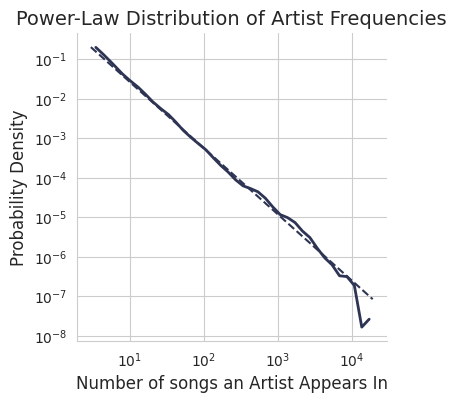

In [9]:
import powerlaw

# Convert the artist occurrence counts into a list
data = list(artist_counter.values())
print("data:{}".format(data))
# Fit the data to a power-law distribution
fit = powerlaw.Fit(data, discrete=True) #discrete:for discrete occurence nbr (not fractions)

fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.spines['top'].set_visible(False) # Hide the top border
ax.spines['right'].set_visible(False) # Hide the right border
#A PDF (Probability Density Function) shows how often different values (artist popularity) occur in your dataset
figCCDF = fit.plot_pdf(color='#2E3454', linewidth=2, ax=ax)
#A dashed line: Represents the power-law model.
fit.power_law.plot_pdf(color='#2E3454', linestyle='--', ax=figCCDF)
# axis labels
ax.set_xlabel("Number of songs an Artist Appears In", fontsize=12)  # X-axis: Artist frequency
ax.set_ylabel("Probability Density", fontsize=12)  # Y-axis: Probability of an artist having that frequency

# Add a title
ax.set_title("Power-Law Distribution of Artist Frequencies", fontsize=14)

plt.show()